## Image Processing 

This project demonstrates fundamental image processing tasks including edge detection and noise reduction. The process includes manually applying Laplacian filters for edge detection, simulating real-world noise (Gaussian and Salt & Pepper), and removing it using suitable filters.

### 1. Importing necessary libraries

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['image.cmap'] = 'gray'


### 2. Loading Grayscale Image or Creating Synthetic Image

A grayscale image is used for simplicity, as edge detection and noise simulation are easier to visualize without color. If the image is unavailable, a synthetic circle is generated to demonstrate the pipeline.

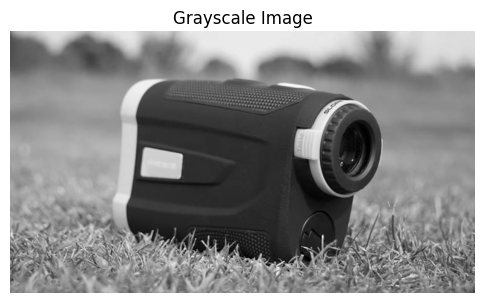

In [67]:

image = cv2.imread('golf.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    image = np.zeros((256, 256), dtype=np.uint8)
    cv2.circle(image, (128, 128), 60, 255, -1)

plt.imshow(image)
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


### 3. Defining Laplacian Filter for Edge Detection

The Laplacian operator is a second-order derivative filter used to highlight areas of rapid intensity change i.e., edges. The filter responds to changes in brightness, making it ideal for edge detection tasks.

In [68]:
laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])


### 4. Implementing Custom Convolution Function

Convolution is the core operation in filtering. Here, we manually implement 2D convolution to understand how each pixel is updated based on its neighborhood using a kernel (Laplacian in this case). Padding with reflect ensures border preservation.

In [69]:

def convolve2d(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)

    return output.astype(np.uint8)


### 5. Applying Laplacian Filter to Detect Edges

The Laplacian kernel is applied to the image using our custom convolution function, highlighting edges by amplifying intensity transitions.



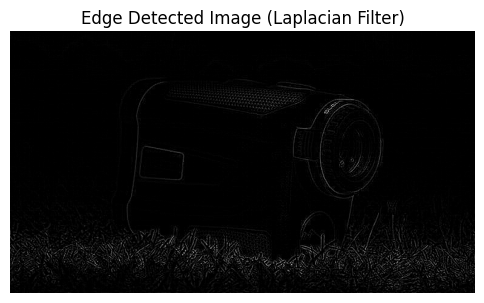

In [70]:
edge_image = convolve2d(image, laplacian_kernel)

plt.imshow(edge_image)
plt.title("Edge Detected Image (Laplacian Filter)")
plt.axis('off')
plt.show()


### 6. Adding Gaussian Noise to Image

Gaussian noise is statistical noise having a probability density function equal to that of the normal distribution. It simulates sensor or electronic circuit noise. The noise is added by generating random values from a Gaussian distribution and adding them to the pixel intensities.

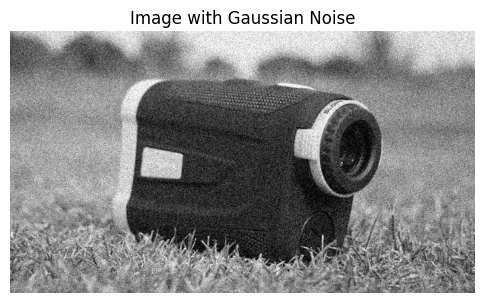

In [71]:
def add_gaussian_noise(img, mean=0, std=25):
    noise = np.random.normal(mean, std, img.shape)
    noisy = np.clip(img + noise, 0, 255)
    return noisy.astype(np.uint8)

gaussian_noisy = add_gaussian_noise(image)

plt.imshow(gaussian_noisy)
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()


### 7. Adding Salt-and-Pepper Noise to Image

Salt-and-Pepper noise introduces random occurrences of white (salt) and black (pepper) pixels. It mimics bit errors or extreme lighting interference in image transmission or acquisition.

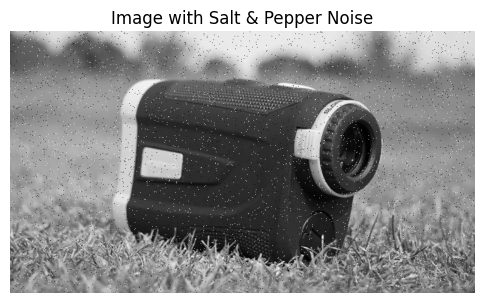

In [72]:
def add_salt_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01):
    noisy = img.copy()
    total_pixels = img.size

    num_salt = int(salt_prob * total_pixels)
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy[tuple(coords_salt)] = 255

    num_pepper = int(pepper_prob * total_pixels)
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy[tuple(coords_pepper)] = 0

    return noisy

sp_noisy = add_salt_pepper_noise(image)

plt.imshow(sp_noisy)
plt.title("Image with Salt & Pepper Noise")
plt.axis('off')
plt.show()


### 8. Denoising Gaussian Noise with Bilateral Filter

Bilateral filtering smooths the image while preserving edges. Unlike Gaussian blur, it considers both spatial closeness and intensity similarity, making it highly effective against Gaussian noise without blurring edge details.

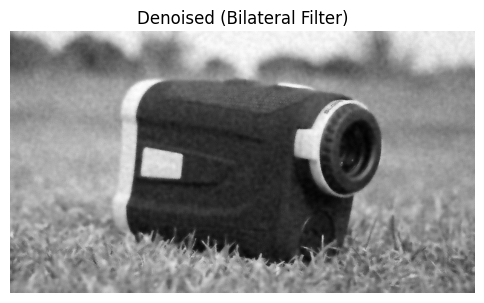

In [73]:
bilateral_denoised = cv2.bilateralFilter(gaussian_noisy, d=9, sigmaColor=75, sigmaSpace=75)

plt.imshow(bilateral_denoised)
plt.title("Denoised (Bilateral Filter)")
plt.axis('off')
plt.show()


### 9. Denoising Salt & Pepper Noise with Median Filter

The median filter replaces each pixel with the median of its neighborhood, effectively removing outlier values like salt or pepper noise. It's widely used in image denoising, especially for impulse noise.

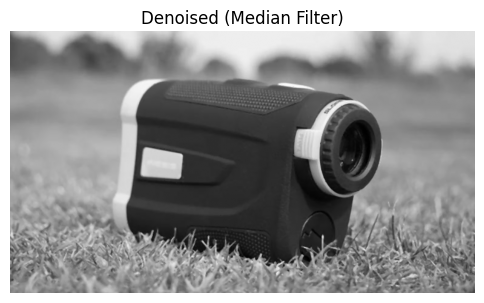

In [74]:
median_denoised = cv2.medianBlur(sp_noisy, 3)

plt.imshow(median_denoised)
plt.title("Denoised (Median Filter)")
plt.axis('off')
plt.show()


### 10. Comparison Grid for All Stages

This grid visually summarizes the entire image processing pipeline, from original image to noisy and denoised versions. It helps compare the effectiveness of each filter against its corresponding noise type.

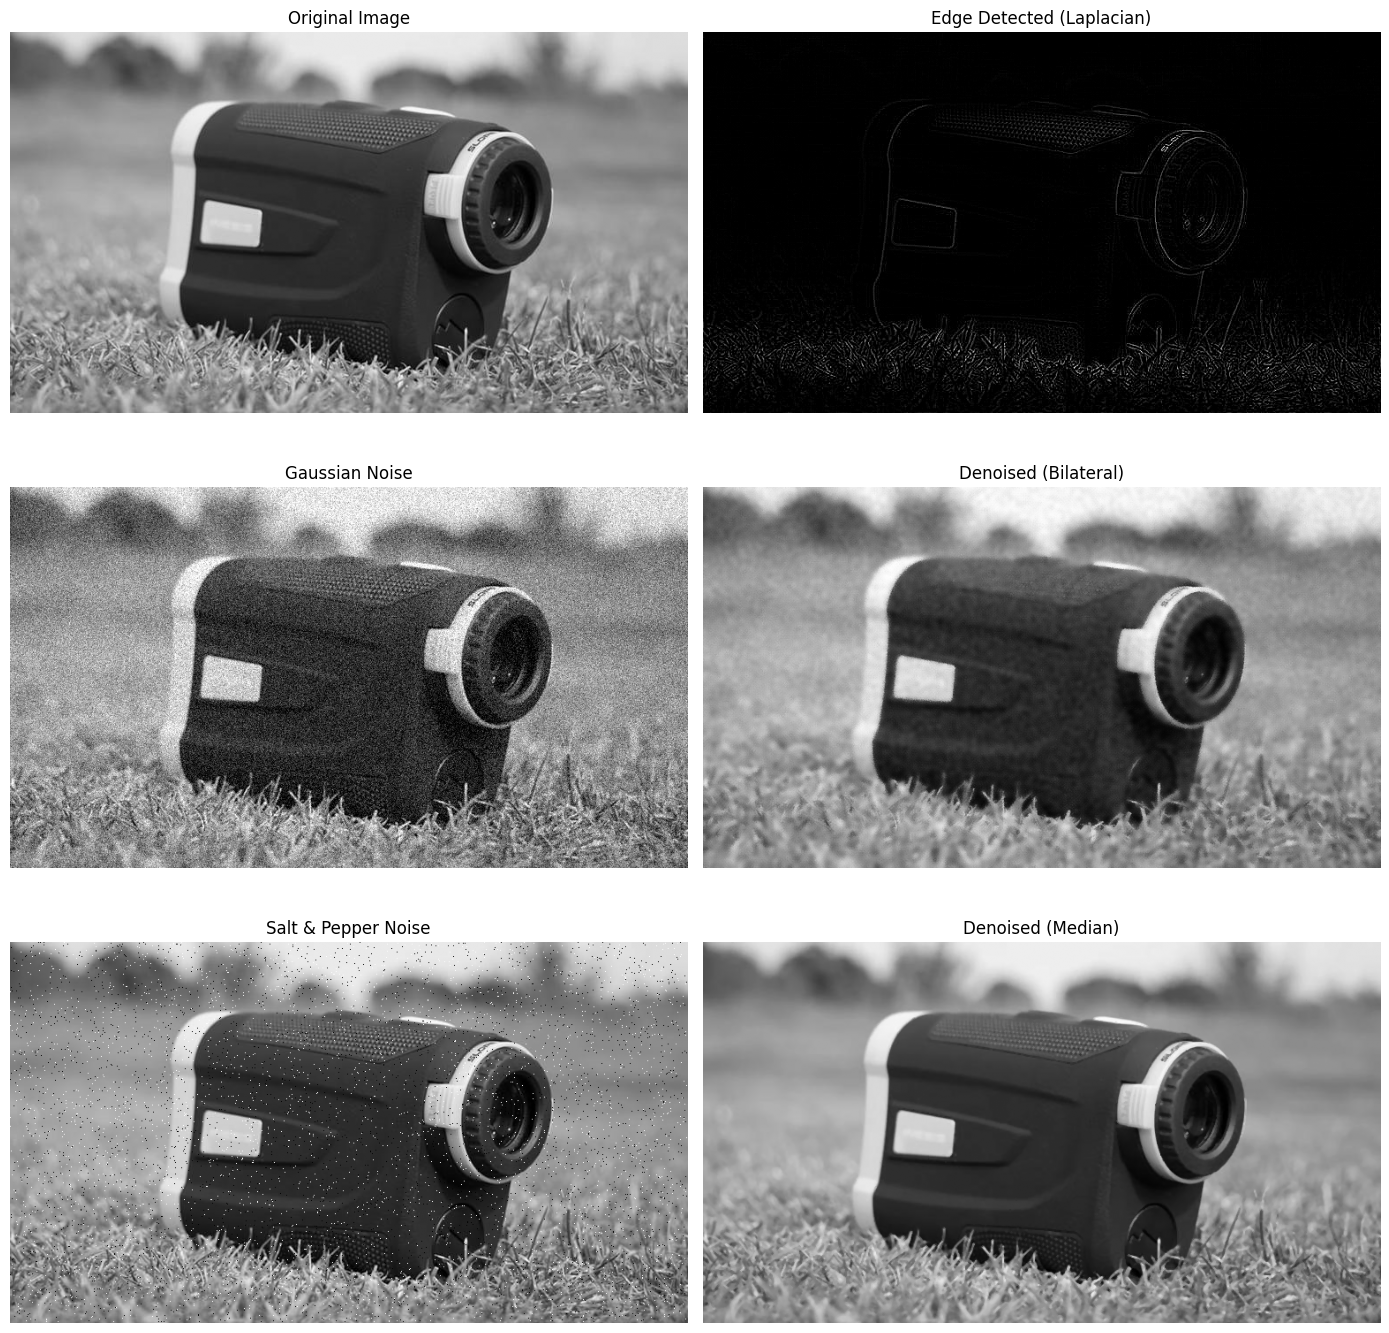

In [75]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

titles = [
    "Original Image", "Edge Detected (Laplacian)",
    "Gaussian Noise", "Denoised (Bilateral)",
    "Salt & Pepper Noise", "Denoised (Median)"
]
images = [
    image, edge_image,
    gaussian_noisy, bilateral_denoised,
    sp_noisy, median_denoised
]

for ax, img, title in zip(axs.ravel(), images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()
